In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.patches import Rectangle, Circle, Patch
from matplotlib.lines import Line2D

## Load Carom Data

In [2]:
file_path = "/home/nithish/autoware/src/universe/autoware.universe/perception/sim_c_v2i_evaluation/data/carom_objects_after_time_compensation/carom_objects.csv"
carom_df = pd.read_csv(file_path, names=["obj1_px", "obj1_py", "obj1_pz", "obj1_qx", "obj1_qy", "obj1_qz", "obj1_qw", "obj1_dim_x", "obj1_dim_y", "obj1_dim_z"])
carom_df.index.name = "frame_id"

In [3]:
carom_df.head(2)

,obj1_px,obj1_py,obj1_pz,obj1_qx,obj1_qy,obj1_qz,obj1_qw,obj1_dim_x,obj1_dim_y,obj1_dim_z
frame_id,,,,,,,,,,
0,-51.950462,33.352117,0.899977,0.0,0.0,-0.763582,0.645711,4.974713,2.000009,1.799953
1,-52.038055,32.821303,0.899977,0.0,0.0,-0.761407,0.648274,4.974713,2.000009,1.799953


## Load Groundtruth data

In [4]:
file_path = "/home/nithish/autoware/src/universe/autoware.universe/perception/sim_c_v2i_evaluation/data/carom_objects_after_time_compensation/ground_truth_objects.csv"
groundtruth_df = pd.read_csv(file_path, names=["obj1_px", "obj1_py", "obj1_pz", "obj1_qx", "obj1_qy", "obj1_qz", "obj1_qw", "obj1_dim_x", "obj1_dim_y", "obj1_dim_z",\
                                              "obj2_px", "obj2_py", "obj2_pz", "obj2_qx", "obj2_qy", "obj2_qz", "obj2_qw", "obj2_dim_x", "obj2_dim_y", "obj2_dim_z"])
groundtruth_df.index.name = "frame_id"

In [5]:
groundtruth_df.head(61)

,obj1_px,obj1_py,obj1_pz,obj1_qx,obj1_qy,obj1_qz,obj1_qw,obj1_dim_x,obj1_dim_y,obj1_dim_z,obj2_px,obj2_py,obj2_pz,obj2_qx,obj2_qy,obj2_qz,obj2_qw,obj2_dim_x,obj2_dim_y,obj2_dim_z
frame_id,,,,,,,,,,,,,,,,,,,,
0,-90.429726,-24.470512,-0.021486,0.001049,-0.000228,-0.022668,0.999742,5.91519,1.988433,2.560655,-52.241161,29.815100,0.003487,-0.000113,-0.000115,-0.709729,0.704475,4.552699,2.097072,1.767166
1,-89.883759,-24.482470,-0.021519,0.000902,-0.000277,-0.018567,0.999827,5.91519,1.988433,2.560655,-52.245308,29.283972,0.003702,0.000053,0.000051,-0.709804,0.704400,4.552699,2.097072,1.767166
2,-89.340828,-24.491623,-0.021450,0.000759,-0.000154,-0.015022,0.999887,5.91519,1.988433,2.560655,-52.249641,28.725538,0.003942,0.000239,0.000235,-0.709910,0.704292,4.552699,2.097072,1.767166
3,-88.802719,-24.498449,-0.021330,0.000616,0.000054,-0.012007,0.999928,5.91519,1.988433,2.560655,-52.253983,28.167158,0.003764,0.000101,0.000098,-0.710032,0.704169,4.552699,2.097072,1.767166
4,-88.268478,-24.503212,-0.021235,0.000501,0.000218,-0.009406,0.999956,5.91519,1.988433,2.560655,-52.258308,27.632128,0.003466,-0.000129,-0.000130,-0.710044,0.704157,4.552699,2.097072,1.767166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-66.111519,-24.498747,-0.020986,-0.000006,0.000881,-0.001163,0.999999,5.91519,1.988433,2.560655,-52.314102,2.411478,0.003360,-0.000213,-0.000210,-0.706059,0.708153,4.552699,2.097072,1.767166
57,-65.851738,-24.499601,-0.020954,-0.000006,0.000953,-0.001229,0.999999,5.91519,1.988433,2.560655,-52.312508,1.902177,0.003378,-0.000178,-0.000176,-0.706036,0.708176,4.552699,2.097072,1.767166
58,-65.720497,-24.500057,-0.021038,-0.000007,0.000817,-0.001241,0.999999,5.91519,1.988433,2.560655,-52.311680,1.642306,0.003513,-0.000087,-0.000085,-0.706025,0.708187,4.552699,2.097072,1.767166


#### Plot Groundtruth and CAROM detection

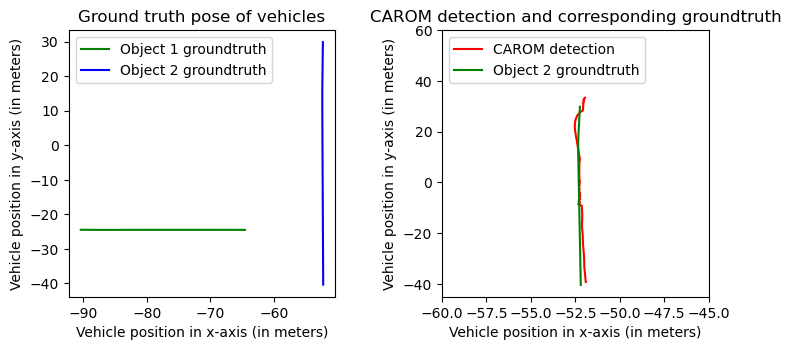

In [6]:
fig = plt.figure() 
fig.set_figwidth(8)
fig.set_figheight(8)
fig.tight_layout(pad=55.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = fig.add_subplot(221) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('Ground truth pose of vehicles')
plt.plot(groundtruth_df.iloc[:, 0], groundtruth_df.iloc[:, 1], label='Object 1 groundtruth', color='green')
plt.plot(groundtruth_df.iloc[:, 10], groundtruth_df.iloc[:, 11], label='Object 2 groundtruth', color='blue')
plt.legend(loc='upper left')

ax = fig.add_subplot(222) 
plt.xlabel("Vehicle position in x-axis (in meters)")
plt.ylabel("Vehicle position in y-axis (in meters)")
plt.title('CAROM detection and corresponding groundtruth')
plt.xlim([-60, -45])
plt.ylim([-45, 60])
plt.plot(carom_df.iloc[:, 0], carom_df.iloc[:, 1], label='CAROM detection', color='red')
plt.plot(groundtruth_df.iloc[:, 10], groundtruth_df.iloc[:, 11], label='Object 2 groundtruth', color='green')
plt.legend(loc="upper left")

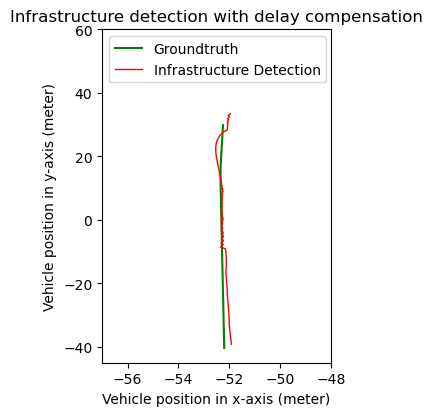

In [7]:
fig = plt.figure() 
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout(pad=55.0)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=1.5, hspace=0.4)

ax = fig.add_subplot(221) 
plt.xlabel("Vehicle position in x-axis (meter)")
plt.ylabel("Vehicle position in y-axis (meter)")
plt.title('Infrastructure detection with delay compensation')
plt.xlim([-57, -48])
plt.ylim([-45, 60])
plt.plot(groundtruth_df.iloc[:, 10], groundtruth_df.iloc[:, 11], label='Groundtruth', color='green')
plt.plot(carom_df.iloc[:, 0], carom_df.iloc[:, 1], label='Infrastructure Detection', color='red', linewidth=1)
plt.legend(loc="upper left")
plt.savefig("infrastructure_detection_with_delay_compensation.png", dpi=300, bbox_inches='tight')

## Finding Intersection Over Union

In [8]:
from shapely.geometry import Polygon
from shapely.affinity import rotate
from matplotlib.patches import Polygon as MplPolygon

In [9]:
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return yaw_z # in radians

In [10]:
def create_rotated_box(center_x, center_y, width, height, angle):
    half_width = width / 2
    half_height = height / 2
    rectangle = Polygon([
        (center_x - half_width, center_y - half_height),
        (center_x + half_width, center_y - half_height),
        (center_x + half_width, center_y + half_height),
        (center_x - half_width, center_y + half_height)
    ])
    rotated_rectangle = rotate(rectangle, angle, origin='center', use_radians=False)
    return rotated_rectangle

In [11]:
def calculate_iou(box1, box2):
    intersection = box1.intersection(box2).area
    union = box1.union(box2).area
    return intersection / union if union > 0 else 0

#### Finding IOU and plotting for a pair of boxes

obj1_rotation:  -99.56195097098724
obj2_rotation:  -90.42577362060547
IoU: 0.14033970762428322
Bounding Boxes with IoU = 0.14


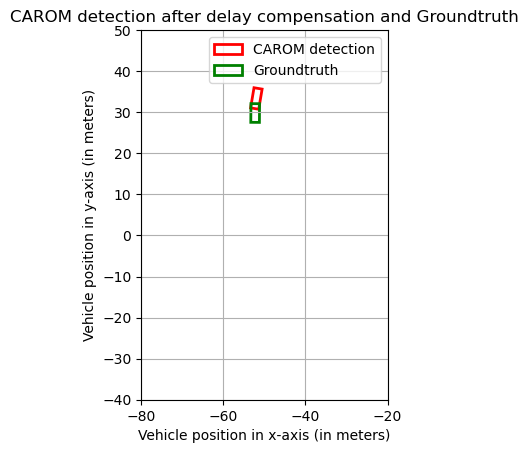

In [12]:
def plot_boxes(box1, box2, iou):
    fig, ax = plt.subplots()
    
    # Convert shapely Polygons to matplotlib Polygons for visualization
    mpl_box1 = MplPolygon(list(box1.exterior.coords), edgecolor='red', facecolor='none', linewidth=2, label='CAROM detection')
    mpl_box2 = MplPolygon(list(box2.exterior.coords), edgecolor='green', facecolor='none', linewidth=2, label='Groundtruth')

    ax.add_patch(mpl_box1)
    ax.add_patch(mpl_box2)

    # Plot the boxes
    ax.set_xlim(-80, -20)
    ax.set_ylim(-40, 50)
    ax.set_aspect('equal', 'box')
    plt.legend()
    print(f"Bounding Boxes with IoU = {iou:.2f}")
    plt.title("CAROM detection after delay compensation and Groundtruth")
    plt.xlabel("Vehicle position in x-axis (in meters)")
    plt.ylabel("Vehicle position in y-axis (in meters)")
    plt.grid(True)
    plt.show()

# Example parameters for two rotated boxes
frame_id = 0
obj1_rotation = euler_from_quaternion(carom_df.iloc[frame_id, 3], carom_df.iloc[frame_id, 4], carom_df.iloc[frame_id, 5], carom_df.iloc[frame_id, 6])
print("obj1_rotation: ", np.rad2deg(obj1_rotation))
center_x1, center_y1, width1, height1, angle1 = carom_df.iloc[frame_id, 0], carom_df.iloc[frame_id, 1],\
                        carom_df.iloc[frame_id, 7], carom_df.iloc[frame_id, 8], np.rad2deg(obj1_rotation)
obj2_rotation = euler_from_quaternion(groundtruth_df.iloc[frame_id, 13], groundtruth_df.iloc[frame_id, 14], groundtruth_df.iloc[frame_id, 15], groundtruth_df.iloc[frame_id, 16])
print("obj2_rotation: ", np.rad2deg(obj2_rotation))
center_x2, center_y2, width2, height2, angle2 = groundtruth_df.iloc[frame_id, 10], groundtruth_df.iloc[frame_id, 11],\
                        groundtruth_df.iloc[frame_id, 17], groundtruth_df.iloc[frame_id, 18], np.rad2deg(obj2_rotation)

# Create the rotated boxes
box1 = create_rotated_box(center_x1, center_y1, width1, height1, angle1)
box2 = create_rotated_box(center_x2, center_y2, width2, height2, angle2)

# Calculate IoU
iou = calculate_iou(box1, box2)
print("IoU:", iou)

# Visualize the boxes
plot_boxes(box1, box2, iou)

In [13]:
def plot_boxes(box1, box2, iou):
    fig, ax = plt.subplots()
    
    # Convert shapely Polygons to matplotlib Polygons for visualization
    mpl_box1 = MplPolygon(list(box1.exterior.coords), edgecolor='red', facecolor='none', linewidth=2, label='CAROM detection')
    mpl_box2 = MplPolygon(list(box2.exterior.coords), edgecolor='green', facecolor='none', linewidth=2, label='Groundtruth')

    ax.add_patch(mpl_box1)
    ax.add_patch(mpl_box2)

    # Plot the boxes
    ax.set_xlim(-80, -20)
    ax.set_ylim(-30, 50)
    ax.set_aspect('equal', 'box')
    plt.legend()
    plt.title(f"Bounding Boxes with IoU = {iou:.2f}")
    plt.xlabel("Vehicle position in x-axis (in meters)")
    plt.ylabel("Vehicle position in y-axis (in meters)")
    plt.grid(True)
    plt.show()

# Example parameters for two rotated boxes
IOUs = []
for frame_id in range(len(carom_df)):
    #print("frame Id: ", frame_id)
    obj1_rotation = euler_from_quaternion(carom_df.iloc[frame_id, 3], carom_df.iloc[frame_id, 4], carom_df.iloc[frame_id, 5], carom_df.iloc[frame_id, 6])
    #print("obj1_rotation: ", np.rad2deg(obj1_rotation))
    center_x1, center_y1, width1, height1, angle1 = carom_df.iloc[frame_id, 0], carom_df.iloc[frame_id, 1],\
                            carom_df.iloc[frame_id, 7], carom_df.iloc[frame_id, 8], np.rad2deg(obj1_rotation)
    obj2_rotation = euler_from_quaternion(groundtruth_df.iloc[frame_id, 13], groundtruth_df.iloc[frame_id, 14], groundtruth_df.iloc[frame_id, 15], groundtruth_df.iloc[frame_id, 16])
    #print("obj2_rotation: ", np.rad2deg(obj2_rotation))
    center_x2, center_y2, width2, height2, angle2 = groundtruth_df.iloc[frame_id, 10], groundtruth_df.iloc[frame_id, 11],\
                            groundtruth_df.iloc[frame_id, 17], groundtruth_df.iloc[frame_id, 18], np.rad2deg(obj2_rotation)
    
    # Create the rotated boxes
    box1 = create_rotated_box(center_x1, center_y1, width1, height1, angle1)
    box2 = create_rotated_box(center_x2, center_y2, width2, height2, angle2)
    
    # Calculate IoU
    iou = calculate_iou(box1, box2)
    IOUs.append(iou)
    #print("IoU:", iou)

    # Visualize the boxes
    #plot_boxes(box1, box2, iou)

print("Mean of IOU: ", np.sum(IOUs)/np.count_nonzero(IOUs))

Mean of IOU:  0.3449215267498827


## Compute RMSE

In [14]:
euclidean_distance = ((groundtruth_df.iloc[:, 10] - carom_df.iloc[:, 0])**2 + (groundtruth_df.iloc[:, 11] - carom_df.iloc[:, 1])**2)**0.5

In [50]:
rmse_combined = np.sqrt(np.mean(euclidean_distance**2))
print(f"Combined RMSE: {rmse_combined:.2f} m")

Combined RMSE: 2.52 m
